In [1]:
import pandas as pd
import matplotlib as plt

1.   Site: Choose one location in the US that you would like to investigate. Make sure that runoff (i.e. “SURP”) is snowmelt influenced.  
**OKANAGO, WA area near Mt. Baker**

2.   Water Balance Terms: Recall that the water balance can be written according to equation 1, where P is precipitation (rain plus snow), ET is evapotranspiration, Q is runoff, S is total storage of moisture (soil moisture plus snowpack), and t is time. (1) Using the variables described in the above table, write out the water balance equation.  Assume that percolation below the plant root zone is negligible (i.e., SURP = Q).  Note: you can check your water balance equation using one realization of WIMP. 

**P-SURP-AE = $\Delta$ST+$\Delta$SST**

In [2]:
wimp0 = pd.read_csv('Okanogan.csv')
wimp0

,MON,TEMP,UPE,APE,PREC,DIFF,ST,DST,AE,DEF,Q,SMT,SST,In,Out,In-Out,Change in (SST+ST)
0,Jan,-6.7,0,0,116,-1,71,0,0,0,0,0,317,116,0,116,117
1,Feb,-3.6,0,0,78,0,71,0,0,0,0,0,395,78,0,78,78
2,Mar,-0.3,0,0,62,114,150,79,0,0,35,71,343,62,35,27,27
3,Apr,3.4,24,28,40,355,150,0,28,0,355,343,0,40,383,-343,-343
4,May,7.6,48,62,29,-33,117,-33,62,0,0,0,0,29,62,-33,-33
5,Jun,11.5,67,89,26,-63,65,-52,79,10,0,0,0,26,79,-53,-52
6,Jul,15.1,84,113,11,-102,24,-41,51,62,0,0,0,11,51,-40,-41
7,Aug,14.8,83,101,16,-85,11,-13,29,72,0,0,0,16,29,-13,-13
8,Sep,10.5,62,64,26,-38,7,-4,29,35,0,0,0,26,29,-3,-4
9,Oct,4.4,30,28,60,32,38,31,28,0,0,0,0,60,28,32,31


### a.   Discuss the relative degree of certainty in future temperature versus precipitation projections for all the GCMs and the two RCP scenarios. Download the data and create plots that show the uncertainty clearly. 
- Processes controlling humidity vertically in the middle and upper atmosphere are difficult to model accurately. This difficulty with only one of several feedback mechanisms underlines the large uncertainty for future precipitation. Temperature variation is dependent on insolation and the location of continental landmass and not influenced substantially by the vertical movement of air and water like precipitation. This simplifies temperature forecasting across the global climate models (Randal et al., 2007).
- *Forecasted Precipitation and Temperature* compares the precipitation and temperature estimates for RCP 4.5 and 8.5; the group of models agrees on a temperature increase.
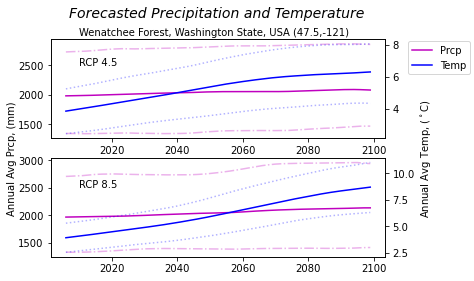

        Figure 1. Ensemble GCM forecasts predict an increase in temperature and and almost no change in precipitation.

- The normalized range of model estimates over time for precipitation and temperature compared below highlights differences in model precision. This is likely a function of modeling skill as well as the field measurements used to train and improve models. Precipitation measurements continue to incorporate larger errors than temperature generally. 
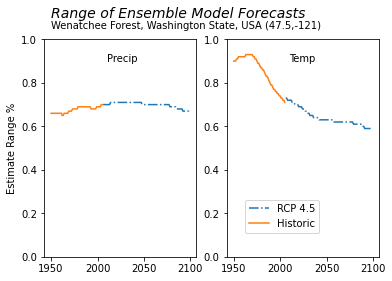

  Figure 2. The range of predicted values is roughly 70 and 60% for the future forecasts of precipitation and temperature when normalized with predicted average values. Improvements to the precision in temperature forecasts are striking. 

### b.   Fill out the following tables below (Make sure  Temp change to °C.) Pick 3 GCMs (name the GCMs you picked) for Temperature and Precipitation changes.    Make two copies of the table, one for RCP 4.5 and another for RCP 8.5. Provide the lat long location you used.

#### Pulling in the data downloaded from Climate Toolbox 
    - https://climatetoolbox.org/tool/future-time-series
    - Location = 47.5, 121 (Wenachee Forest, WA)

In [3]:
china4 = pd.read_csv('hw2RawData/China4.csv', parse_dates= {'Date': ['Year', 'Month', 'Day']},keep_date_col=True)
china8 = pd.read_csv('hw2RawData/China8.csv', header=9, parse_dates= {'Date': ['Year', 'Month', 'Day']},keep_date_col=True)
Norway4 = pd.read_csv('hw2RawData/NorESM1_M4.csv', header=9, parse_dates= {'Date': ['Year', 'Month', 'Day']},keep_date_col=True)
Norway8 = pd.read_csv('hw2RawData/NorESM1_M8.csv', header=9, parse_dates= {'Date': ['Year', 'Month', 'Day']},keep_date_col=True)
US4 = pd.read_csv('hw2RawData/GFDL_ESM2M4.csv', header=9, parse_dates= {'Date': ['Year', 'Month', 'Day']},keep_date_col=True)
US8 = pd.read_csv('hw2RawData/GFDL_ESM2M8.csv', header=9, parse_dates= {'Date': ['Year', 'Month', 'Day']},keep_date_col=True)
history = pd.read_csv('hw2RawData/GRIDMET.csv', header=9, parse_dates= {'Date': ['Year', 'Month', 'Day']},keep_date_col=True)

#### Renaming columns for ease of interpretation

In [4]:
china4.columns = ['Date','Year', 'Month', 'Day', 'taMax', 'taMin', 'prcp']
china8.columns = ['Date','Year', 'Month', 'Day', 'taMax', 'taMin', 'prcp']
Norway4.columns = ['Date','Year', 'Month', 'Day', 'taMax', 'taMin', 'prcp']
Norway8.columns = ['Date','Year', 'Month', 'Day', 'taMax', 'taMin', 'prcp']
US4.columns = ['Date','Year', 'Month', 'Day', 'taMax', 'taMin', 'prcp']
US8.columns = ['Date','Year', 'Month', 'Day', 'taMax', 'taMin', 'prcp']
history.columns = ['Date','Year', 'Month', 'Day', 'taMin', 'taMax', 'prcp']

#### Sum up all the precipitation for each month within year.

In [5]:
C4prcp_monthly = china4.groupby(["Year", "Month"])[["prcp"]].sum()
C8prcp_monthly = china8.groupby(["Year", "Month"])[["prcp"]].sum()
N4prcp_monthly = Norway4.groupby(["Year", "Month"])[["prcp"]].sum()
N8prcp_monthly = Norway8.groupby(["Year", "Month"])[["prcp"]].sum()
US4prcp_monthly = US4.groupby(["Year", "Month"])[["prcp"]].sum()
US8prcp_monthly = US8.groupby(["Year", "Month"])[["prcp"]].sum()
Hist_prcp_monthly = history.groupby(["Year", "Month"])[["prcp"]].sum()

#### Take an average for the max and min temperatures for each month within year.

In [6]:
C4taMax_monthly = china4.groupby(["Year", "Month"])[["taMax"]].mean()
C8taMax_monthly = china8.groupby(["Year", "Month"])[["taMax"]].mean()
N4taMax_monthly = Norway4.groupby(["Year", "Month"])[["taMax"]].mean()
N8taMax_monthly = Norway8.groupby(["Year", "Month"])[["taMax"]].mean()
US4taMax_monthly = US4.groupby(["Year", "Month"])[["taMax"]].mean()
US8taMax_monthly = US8.groupby(["Year", "Month"])[["taMax"]].mean()
Hist_taMax_monthly = history.groupby(["Year", "Month"])[["taMax"]].mean()
C4taMin_monthly = china4.groupby(["Year", "Month"])[["taMin"]].mean()
C8taMin_monthly = china8.groupby(["Year", "Month"])[["taMin"]].mean()
N4taMin_monthly = Norway4.groupby(["Year", "Month"])[["taMin"]].mean()
N8taMin_monthly = Norway8.groupby(["Year", "Month"])[["taMin"]].mean()
US4taMin_monthly = US4.groupby(["Year", "Month"])[["taMin"]].mean()
US8taMin_monthly = US8.groupby(["Year", "Month"])[["taMin"]].mean()
Hist_taMin_monthly = history.groupby(["Year", "Month"])[["taMin"]].mean()

#### Join the monthly tables together for each climate model and GRIDMET data.

In [7]:
C4_monthly = pd.merge(pd.merge(C4taMax_monthly, C4taMin_monthly, left_index=True, 
                      right_index=True), C4prcp_monthly, left_index=True,
                      right_index=True)
C8_monthly = pd.merge(pd.merge(C8taMax_monthly, C8taMin_monthly, left_index=True, 
                      right_index=True), C8prcp_monthly, left_index=True,
                      right_index=True)
N4_monthly = pd.merge(pd.merge(N4taMax_monthly, N4taMin_monthly, left_index=True, 
                      right_index=True), N4prcp_monthly, left_index=True,
                      right_index=True)
N8_monthly = pd.merge(pd.merge(N8taMax_monthly, N8taMin_monthly, left_index=True, 
                      right_index=True), N8prcp_monthly, left_index=True,
                      right_index=True)
US4_monthly = pd.merge(pd.merge(US4taMax_monthly, US4taMin_monthly, left_index=True, 
                      right_index=True), US4prcp_monthly, left_index=True,
                      right_index=True)
US8_monthly = pd.merge(pd.merge(US8taMax_monthly, US8taMin_monthly, left_index=True, 
                      right_index=True), US8prcp_monthly, left_index=True,
                      right_index=True)
Hist_monthly = pd.merge(pd.merge(Hist_taMax_monthly, Hist_taMin_monthly, left_index=True, 
                      right_index=True), Hist_prcp_monthly, left_index=True,
                      right_index=True)

#### Use excel some several functions I am not able to do in Python yet:
        - pivot function to find the average monthly temperature using a simplified estimate (avg = (min+max)/2). 
        - save new composite table as a csv for plotting in Python.
        - transpose the data for the tables.

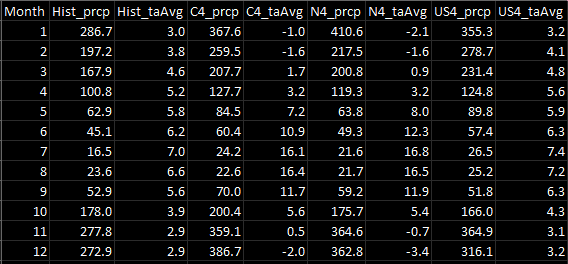

#### Table 1. Precipitation RCP 4.5 

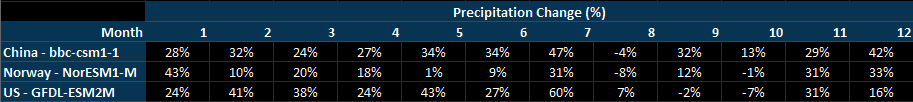

#### Table 2. Temperature RCP 4.5
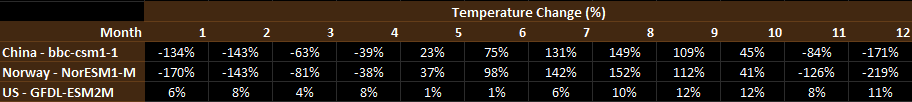

#### Forecasted Precipitation & Temperature Data - RCP 4.5

All three models predict an increase in precipitation; mostly an intensification of winter precipitation between November and March. Summer and Fall precipitation is realatively the same as the historic average. 

There is a striking deviation between the US/Historic and the Chinese and Norwegian model predictions seasonally. Although all three models predict an increase in temperature, the models produced in other countries do not track the seasonal changes well when compared to historic Summer-Winter cycles. This seasonal deviation is interesting because it highlights that although precipitation has more uncertainty associated with it, predicted temperature changes differ substantially between the annual and monthly time scales. 

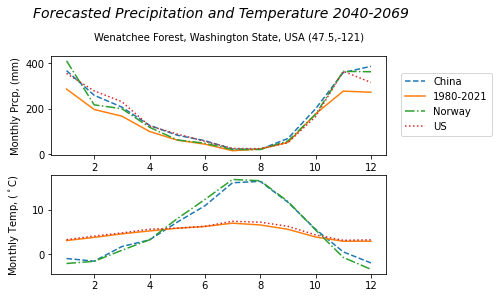

Figure 3. Comparing precipitation and temperature forecasts between the three models reveals substantial differences over a monthly time scale. The US model tracks near the Historic values while the other models predict an intensification of seasonal temperature patterns. 


#### Table 3. Precipitation RCP 8.5
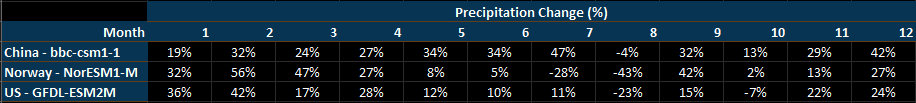

#### Table 4. Temperature RCP 8.5
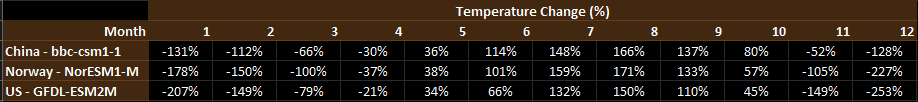

#### Forecasted Precipitation & Temperature Data - RCP 8.5

The noticeable change with RCP8.5 is that now the US model nearly matches the Chinese and Norwegian forecasts and is not tracking the historic monthly cycle for temperature. Otherwise, the influence of more carbon slightly increases the magnitude of the same patterns as RCP4.5 for both temperature and precipitation. 
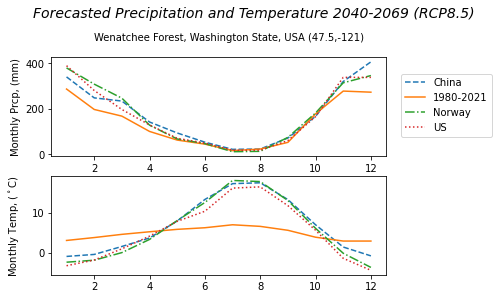

  Figure 4. Similar seasonal variation to RCP 4.5 is predicted with RCP 8.5 and the US model swithces from tracking the Historic patterns to nearly matching the other two model's output. 

### 4. Climate Change Impacts on the Water Balance – future climate projections.
#### a. Run WIMP for current and future climates. 
#### b. Produce mean monthly water balance plots from these results.
![alt text](Monthly%20Water%20Budget%20Changes%20RCP%204.5.PNG)

Figure 5. Monthly water budget fluxes indicate substantial departure from historic values for all three models. The exagerated seasonal temperature and precipitation patterns highlighted in Figure 2 for the Chinese and Norwegin models, underly the accumulation of more water in snowpack during the winter. This drives a shift in the runoff timing and magnitude, reducing April and increasing May. 

![alt text](Monthly%20Water%20Budget%20Changes%20RCP%208.5.PNG)

Figure 6. Monthly water budget fluxes mimic the same patterns as in RCP4.5 with slightly larger magnitudes in RCP 8.5.  

#### 4c. Discuss
- The location in Wenatchee, WA is a snow-dominant watershed receiving the majority of its precipitation as snow during the winter season historically. The future climate forecasts agree on an increase in annual average temperature and precipitation. However, at a monthly scale, the models predict exaggerated seasonal patterns in temperature and precipitation. Enhancing winter precipitation and also decreasing winter temperatures results in a substantial increase in the snow water equivalent (SWE). Enhanced SWE requires more energy to melt, shifting peak runoff time from April to May. Peak flows increase by roughly 400 mm which is an increase of nearly 25% from historic levels. Given the proximity to the Okanogan River, this forecast implies interesting considerations for water managers and growers.

- Water managers may need to adjust for changes in peak flow volume and timing. The Okanogan River drains more than 21,000 square kilometers of Canada and Washington and is relevant to downstream ecosystems and municipalities; it is one of the larger tributaries to the Columbia River (DNR, 2021). Growers may encounter an appreciable change in the Okanogan Valley or other nearby areas that depend on flows from the Wenatchee Forest. Current winter conditions are a challenge for winter wheat growers because plants must emerge before snowfall and remain viable until spring thaws. Winter wheat requires exceptional hardiness for both cold and fungal growth in the conditions. Current varieties may not be up to the harsher winters and prolonged snowpack, requiring a shift in crop type or land use. Changes at the monthly scale are not consistent between models for RCP 4.5 but they are for 8.5. Interestingly, analysis at the monthly scale for the three models selected differs substantially from the ensemble predictions for precipitation. The has bearing on how seriously managers and growers can take current seasonal forecasts. A meaningful connection between the global and regional scales remains an important direction of work. 

### 5. Climate Change Impacts on the Water Balance – factor isolation sensitivity analyses.

#### a. Leave precipitation unchanged, but gradually increase temperature.
<div>
<img src="attachment:BaselineTemp.png" width="500"/>
</div>

|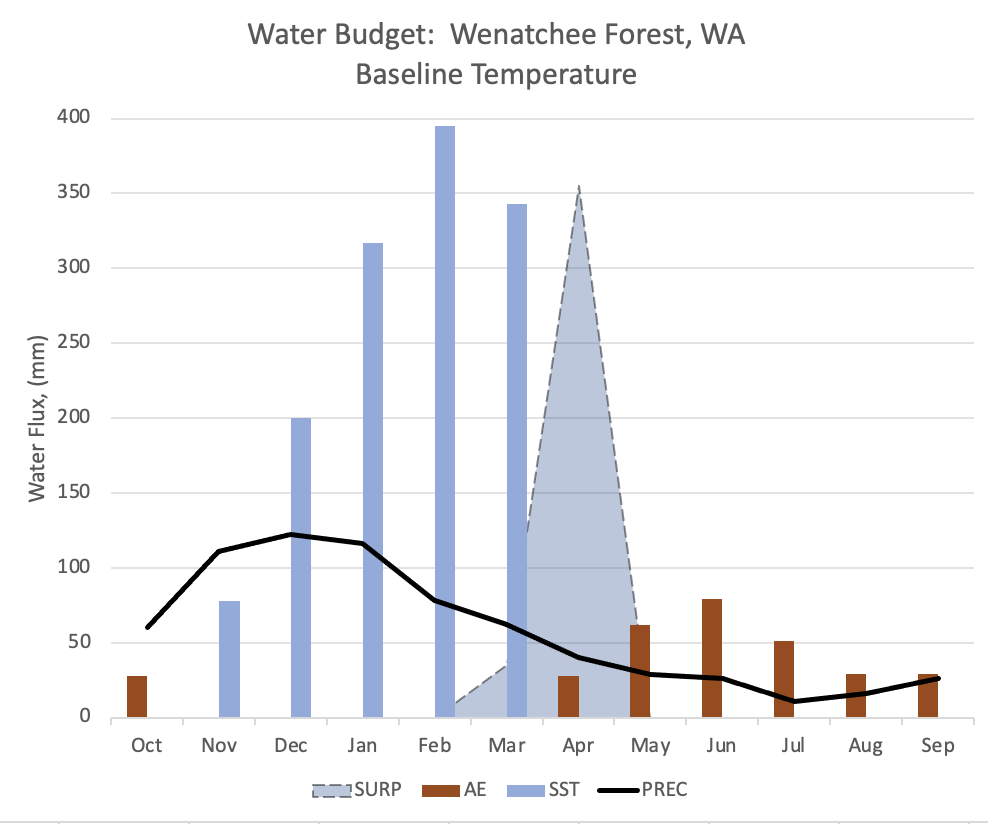 |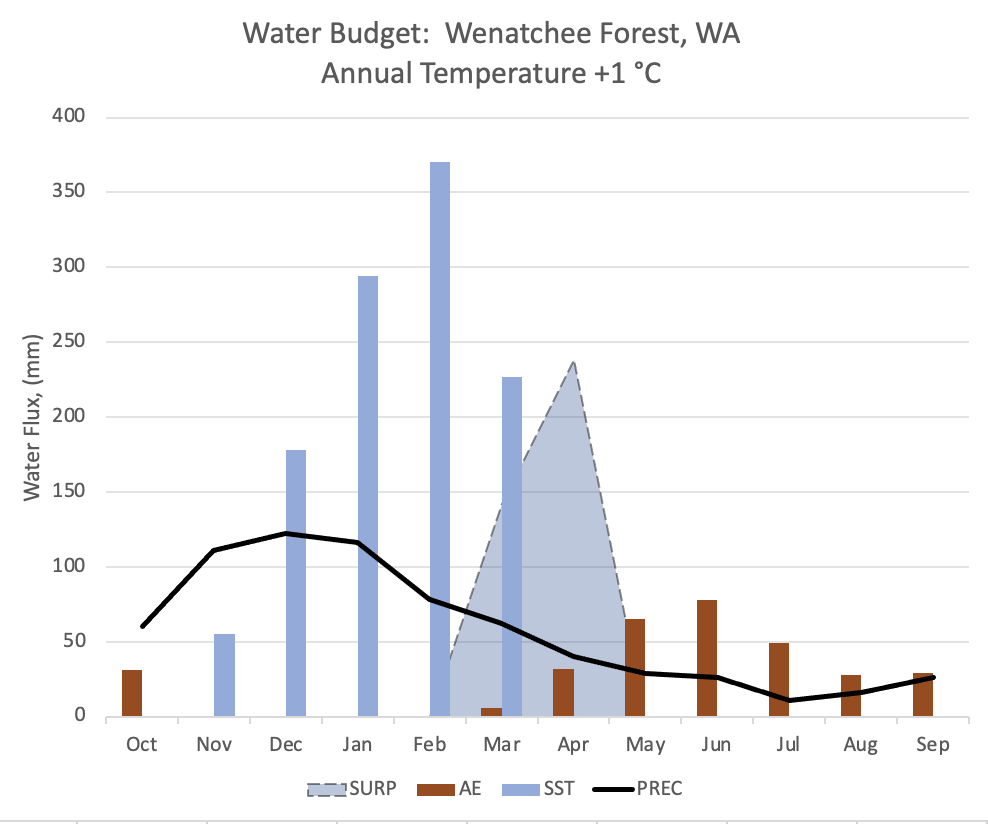
|-|-|
|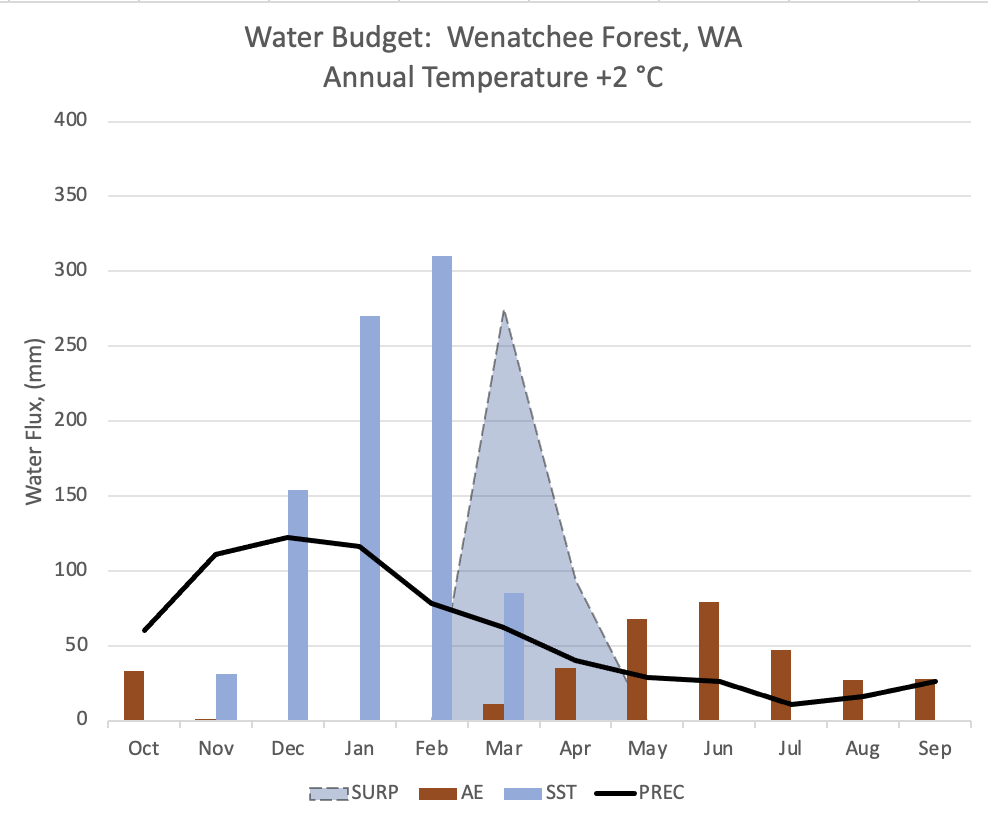 |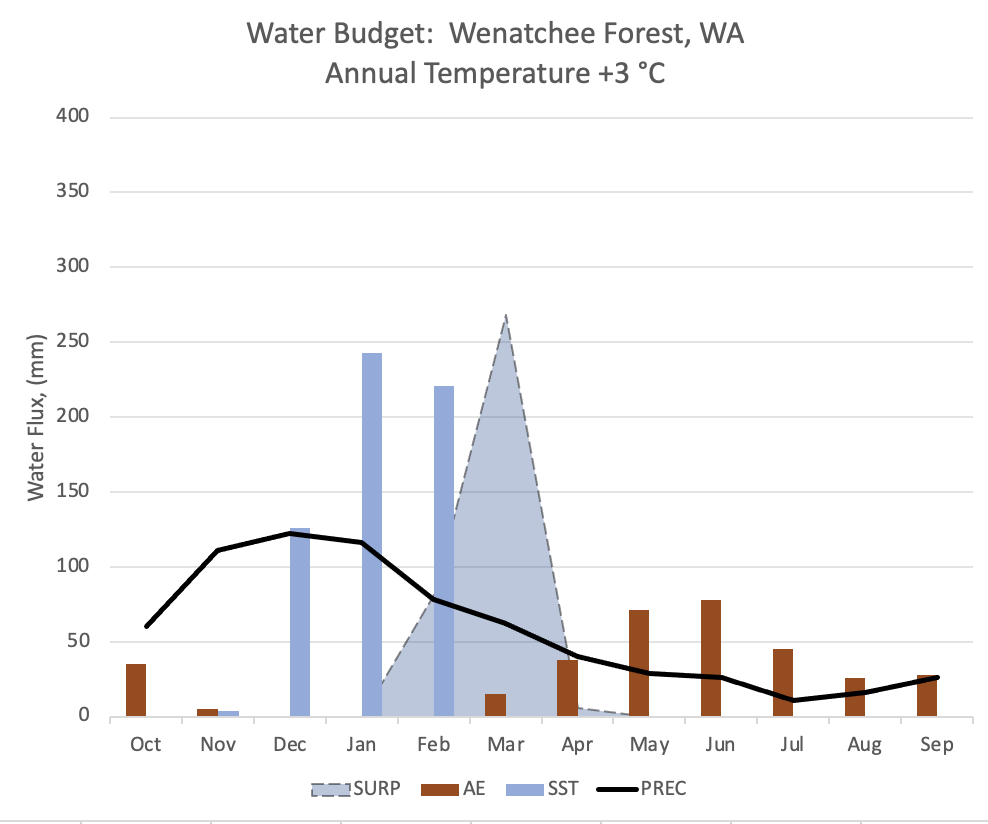
|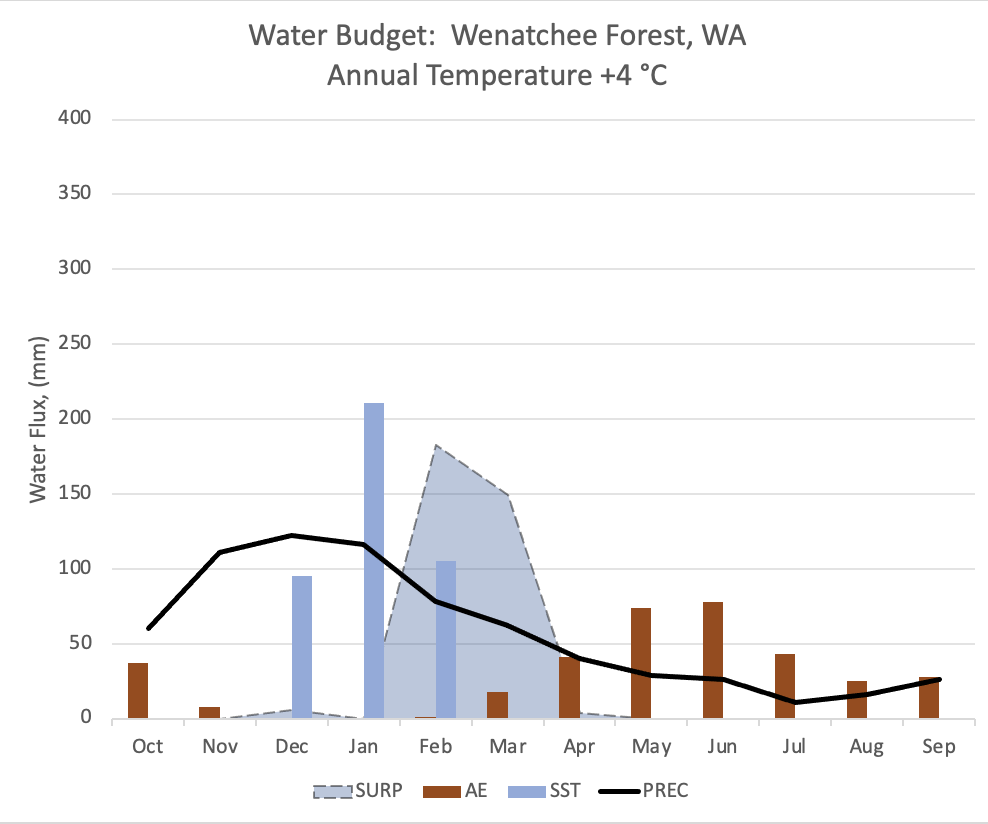 

#### b. Leave temperature unchanged, but gradually increase the precipitation.
|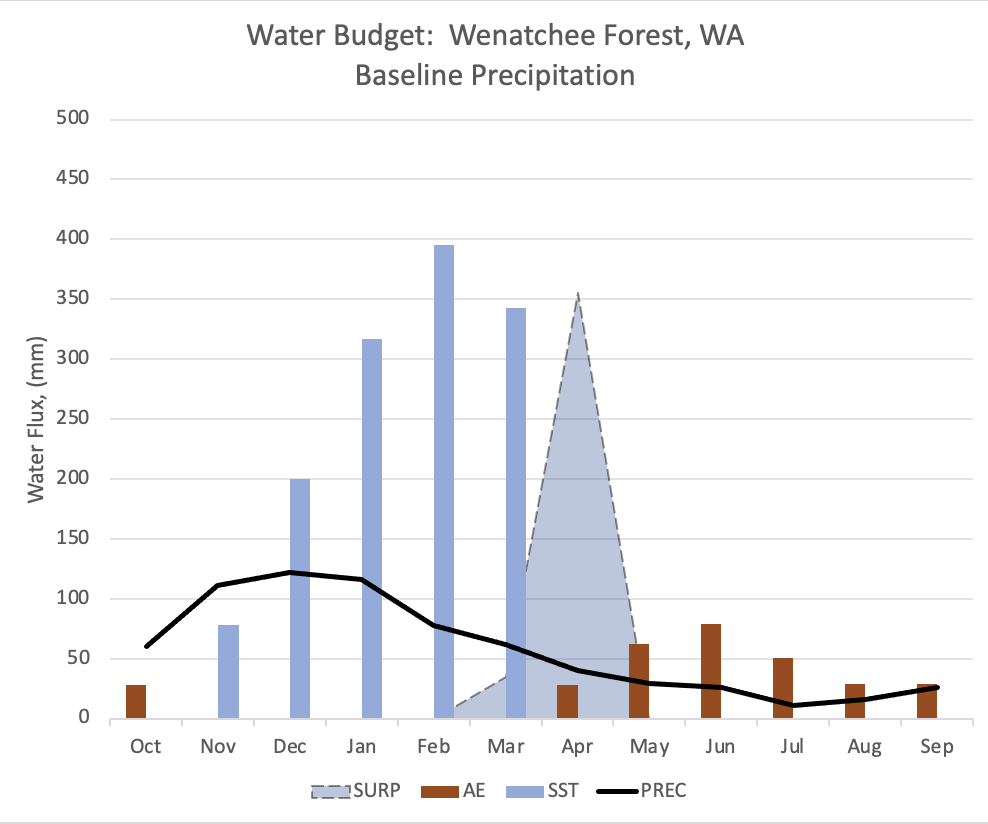 |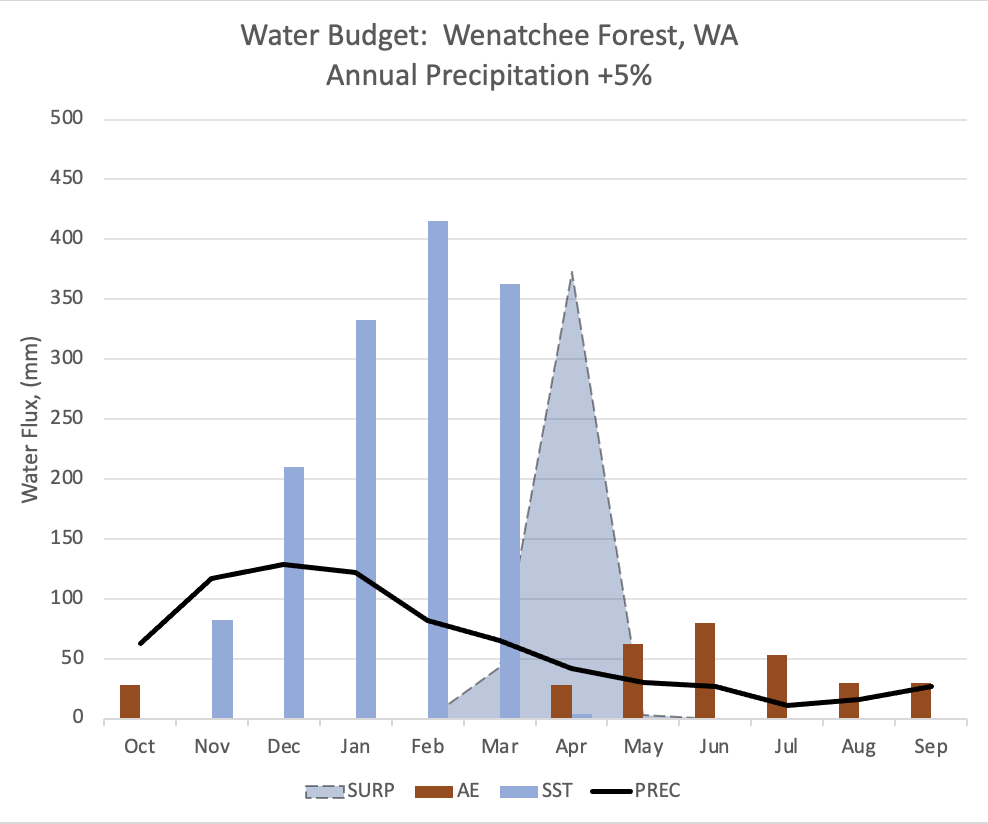
|-|-|
|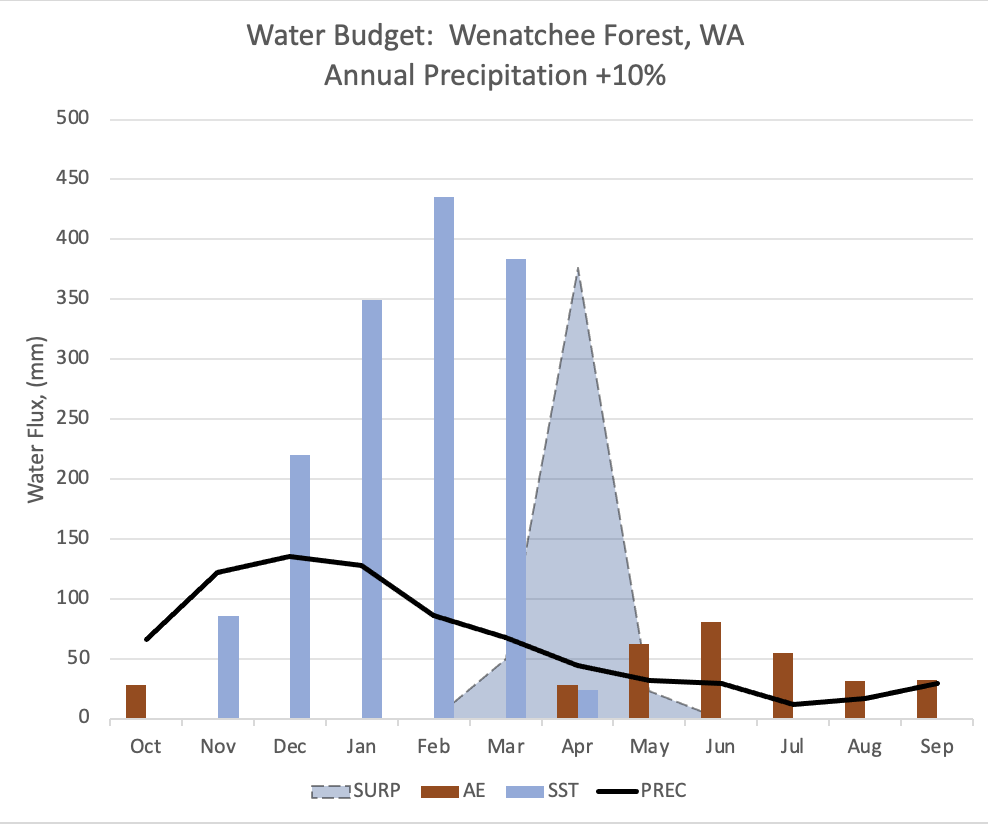 |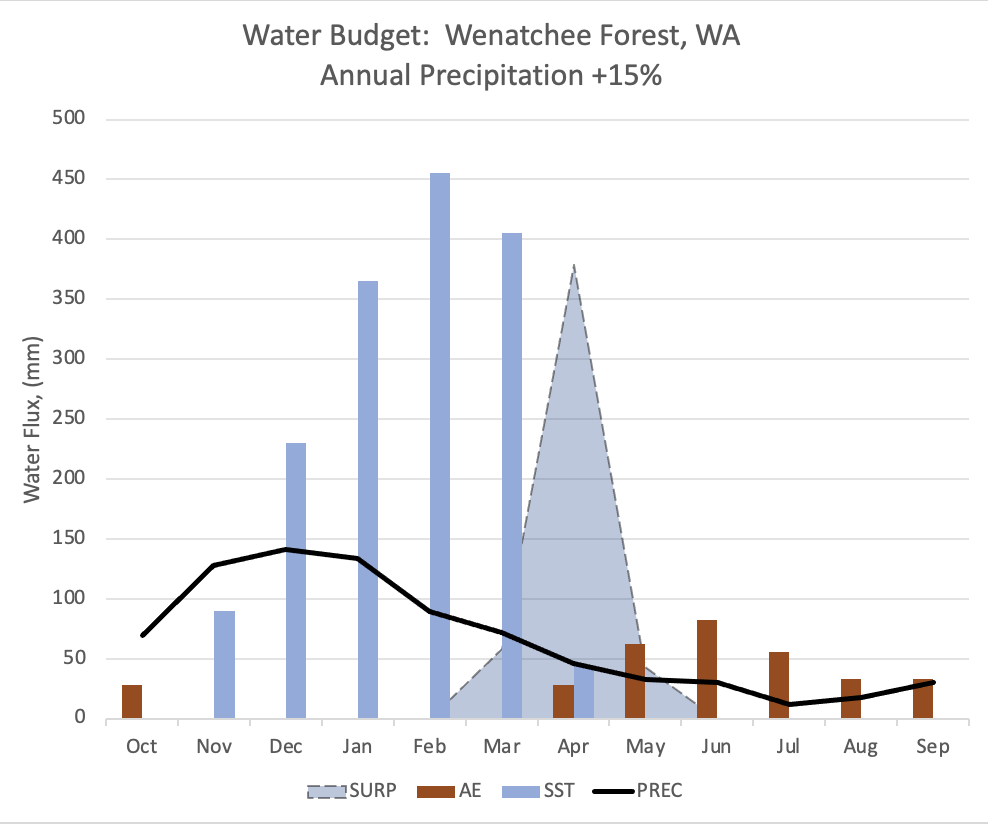
|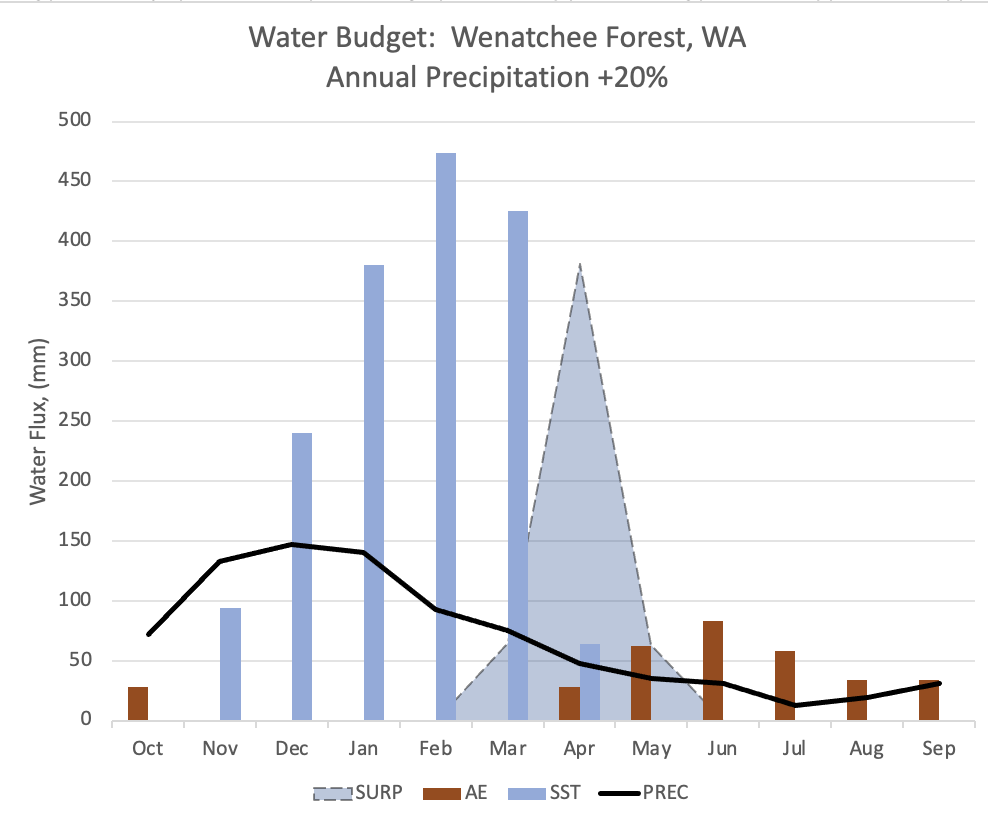 

#### c. Discuss the role of snowmelt in the water balance and how agriculture and other water usages might be affected in a gradually warming vs gradually wettening climate. 
1. What variables are most sensitive to temperature? 
    
    a. Temperature increases strongly influence the development of snowpack and the SST variable. As temperature increases, while holding precipitation constant, less SST develops over the winter season and it melts off more quickly. Less water is stored as snow for a shorter number of months, so runoff begins earlier, beginning to peak a full two months earlier with a 4 C change in temperature. The actual evaporation, AE, increases slightly but depends on the presence of surface or soil water. The increase in energy on the surface would generate higher sensible heat as a result, creating drier air conditions during the summer months when latent heat release is not possible without additional precipitation. 
    


2. What variables are most sensitive to precipitation? 
    
    b. Snowpack responds strongly to the increase in precipitation. The storage of more water as snow in the winter months increased SST by nearly 100 mm in February at its greatest depth. The greater amount of energy required to ripen and melt this much deeper snowpack results in an extended runoff period. Under the 20% scenario, SST lasts until May not only driving runoff into June but supplying enough soil moisture to sustain elevated AE through June and July. Wetting the ground up for a full two additional months is a substantial change for the watershed. Likely feedbacks in the Wenatchee Forest include additional plant growth supported by AE, cooler surface temperatures with more latent heat release, and improved riparian habitat as a result of more substantial baseflow conditions. 
  
  
  
3. Based on this and the relative uncertainty of precipitation versus temperature projections, what can we say about future streamflow projections at this site? 
    
    c. The ensemble forecasts differ substantially from the three individual models for the Wenatchee Forest. Ensemble predictions were uncertain of any appreciable change in precipitation and predicted a moderate temperature increase of 2-3 C by the 2050s. The individual models predicted increases in precipitation and enhancement of winter cold and summer heat for temperature. The changes affected SST and shifted runoff from April to May. The general agreement on the increased annual temperatures indicates that SST will likely decline by the 2050s. The complex relationship between temperature and precipitation at the monthly scale and its influence on the development of snowpack create more uncertainty in the short term about peak flow volume and timing. The change in the US model between RCP 4.5 and 8.5 (Figures 3 & 4) underlines this problem. Between now and the 2050's it's likely that normal and possibly exaggerated variance may accompany general warming on an annual scale. 
 
 
 
4. What aspects of the streamflow projections do we know with highest certainty? 
    
    d. Streamflow is tied to precipitation, so we understand the timing and volume of runoff as well as understand future precipitation projections. Given the confidence in increased temperatures, it's almost certain that runoff will occur earlier than historic records. This agrees with the literature in terms of shifting precipitation regimes and earlier peak runoff timing (Mote et al., 2008). 


5. What aspects do we know with least certainty? Can we plan around the projected changes that are associated with the most certainty (see next question below)? 
    
    e. The volume of streamflow is most uncertain. This has implications for growing season uses and baseflow-dependent processes. Because the amount of water available is least certain and runoff timing is expected to shift earlier in the year, it is most important to consider water uses in the spring that exacerbate low baseflows. The baseflow period may increase with earlier peak runoffs, leaving ecosystems and growers in a more vulnerable state through the later summer and fall. Baseflow-dependent processes may become more prone to water shortage as a result.  

### 6. Thought Exercise: To what extent should policy decisions be based on the results from this analysis? What would you do to improve this analysis with the objective of informing policy decisions?
1. Results from this analysis do not reveal anything novel and underline the consensus for temperature increases and the uncertainty surrounding precipitation. Policy decisions incorporate more than science because politics are responsible for enacting change. Across the spectrum, politicians are taking some action in light of future climate predictions. Two primary points of policy appear common between the most politically polar states; Washington and Texas. Both states have either regional or state-led climate action plans that address shifting away from fossil fuels and continued regional climate research(Washington Government, 2021; Georgetown Climate Center, 2021). Policy decisions to reduce carbon inputs which are driving temperature increase and push for improved data and information about regional changes are rooted in the current future climate forecasts. 


2. It's recommended to compare the results of 10 models to gain insight into various outcomes (Randal et al. 2008). Deep analysis of different models and comparison of downscaling methods is appropriate for further clarifying sources of error or uncertainty derived from the model's representation of future climate. Equally as important is the development of stakeholder groups for the affected communities and organizations. Assuming that the right people or groups are brought together, the data may need to support a decision style modeling output. Connecting the future climate scenarios to a representative water budget model would simply and enhance the conversation around climate and water budget connections. Further analysis may not be necessary and simply linking the models together could produce a powerful tool for action groups to work with. Fleshing out everyone's expectations and assumptions with such a climate-water budget tool would clarify where further analysis or characterization of uncertainty is required to support future policy action.

### 7. Thought Exercise: Compare your approaches for parts 4 vs 5 – what can we learn from performing a climate change projection analysis? When would we do this type of analysis (i.e., projections)? What can we learn from the factor isolation sensitivity analyses? When would we do this type of analysis (i.e., sensitivity)?
1. Climate projection analysis and isolation analysis provide insight into both how well models agree on future climate and the main effects of climate on water budget variables of interest. The projection approach highlighted an agreement in temperature increase with the best data currently available. Although there was not a consensus on future precipitation from the ensemble prediction, interesting monthly scale patterns emerged from the individual model investigation. The model agreement was low for precipitation but the timing of precipitation and temperature changes elicit an unexpected response in the watershed by producing a larger snowpack which resulted in larger and later peak runoff. This directly contradicts the expectation that temperature increase will cause snow-to-rain transition, moving peak flows earlier in the season albeit at roughly the same volumes. For watersheds with snowpack dependencies, it is important to consider and understand how the predicted temperature increases will manifest at the monthly scale. Under RCP 8.5 the three models selected are likely to predict an intensification of historic seasonal patterns resulting from the positive water vapor feedback mechanism. This investigation highlights the interplay between annual and seasonal patterns and the resulting timing for peak flows. 



2. Projection analysis such as this plays a role in water supply and demand forecasting. It helps to clarify future peak flow and may provide some insight into runoff timing. Peak flows are relevant for water storage and flood control processes and runoff timing also connects strongly with water use such as irrigation. Similar projection analysis performed as part of the Long Term Supply and Demand Report for the Columbia River Basin aims at predicting peak flow, base flow, and runoff timing (2021). Assessing the timing for peak irrigation demand within the growing season against baseflow amounts and timing is just one example of how this analysis can touch on policymaking. Water allocations for each year and target instream flow rates throughout the water year are two determinations related to projection analysis that Washington State uses currently. 



3. Factor isolation analysis highlights the dependence of the Wenatchee Forest watershed on snowpack. This analysis helps to clarify climate effects on water budgets by conducting a one factor at a time (OFAT) style test. For both temperature and precipitation, the snowpack-runoff relationship stands out as the dominant change. Temperature increases reduce snowpack development in the winter and shift runoff earlier in the season. Stronger potential evaporation conditions also drive increased actual evaporation while water is present. However, following spring runoff, actual evaporation is slightly depressed because there isn't moisture available. This analysis provides insight into how temperature increase may affect crops, soil moisture, and possibly elevated fire conditions with increased surface air temperature. The main effects of precipitation OFAT are similarly connected to snowpack-runoff. Additional moisture elevates snowpack, spring runoff, and extends runoff through May. This impacts actual evaporation through July indicating sufficient water for latent heat release. This carries similar ramifications for irrigation timing and intensity in August as was the cast for temperature analysis. Higher baseflow and soil moisture into the summer may offset irrigation demand if crop type and acreage were constant. 



4. Isolation sensitivity analysis highlights the main effects between inputs and outputs. The dependencies between temperature, precipitation, and each water budget variable are important to understand. The responses indicate how realistic the model is behaving and supply modelers with a suite of simple if-then scenarios that connect strongly with stakeholders. Because temperature estimates are more certain, it is important to characterize the feedback between snowpack-runoff as most likely. However, exploring the sensitivity with precipitation highlights how its influence may compensate or overwhelm the effects of temperature. This underlines the importance of continued research into the future of precipitation patterns and the improvement of precipitation measurements in the field. Both as an exploratory tool for model function and a method for determining model shortcomings for a direction of work, isolation sensitivity analysis is an excellent method.  

### References:
   1. Georgetown Climate Center (October 23, 2021). Accessible at https://www.georgetownclimate.org/adaptation/state-information/texas/overview.html
    
   2. Mote, P., Salathe, E., Duliere, V., and Jump, E. 2008. Scenarios of future climate for the Pacific Northwest. Climate Impacts Group, University of Washington. March 2008. Seattle, Washington, Climate Impacts Group. Accessible at http://cses.washington.edu/cig/
    
   3. Randall, D.A., R.A. Wood, S. Bony, R. Colman, T. Fichefet, J. Fyfe, V. Kattsov, A. Pitman, J. Shukla, J. Srinivasan, R.J. Stouffer, A. Sumi and K.E. Taylor, 2007: Cilmate Models and Their Evaluation. In: Climate Change 2007: The Physical Science Basis. Contribution of Working Group I to the Fourth Assessment Report of the Intergovernmental Panel on Climate Change [Solomon, S., D. Qin, M. Manning, Z. Chen, M. Marquis, K.B. Averyt, M.Tignor and H.L. Miller (eds.)]. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA.
    
   4. Washington State Crop Improvement Association (October 24, 2021). Accessible at http://washingtoncrop.com/crops_cat/hard-red-winter-wheat/
    
   5. Washington State Department of Natural Resources (October 23, 2021). Accessible at https://okanogancounty.org/departments/natural_resources/watersheds/okanogan.php
    
   6. Washington State Department of Ecology (2021). Columbia River Basin Long Term Supply and Demand Forecast. Unpublished report. 
    
   7. Washinton State Government (October 23, 2021). Accessible at https://www.governor.wa.gov/issues/issues/energy-environment